# Daksh Khetarpaul
# Programming Exercise \#3
---

# Preamble

In [34]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [35]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Noise Level Classification Using Plug-in Classifiers**

## 1.1

### (a)

In [36]:
nstr_ds = pd.read_csv('NoiseClassificationTrainingData.csv')

# Splitting the data by class
class_0_data = nstr_ds[nstr_ds['ClassLabel'] == 0.0]['NoiseLevel']
class_1_data = nstr_ds[nstr_ds['ClassLabel'] == 1.0]['NoiseLevel']
class_2_data = nstr_ds[nstr_ds['ClassLabel'] == 2.0]['NoiseLevel']

# Maximum Likelihood Estimation for the means
mean_0 = class_0_data.mean()
mean_1 = class_1_data.mean()
mean_2 = class_2_data.mean()

deviations = pd.concat([
    class_0_data - mean_0,
    class_1_data - mean_1,
    class_2_data - mean_2
])

n = len(nstr_ds)  # Total number of data points
squared_deviations = (deviations ** 2).sum()  # Sum of squared deviations
common_variance = squared_deviations / n  # Divide by total number of points for MLE



# Output the results with a formal print statement
print("ML Estimates for the dataset:")
print(f"Mean of Class 0 (Quiet environment): {mean_0}")
print(f"Mean of Class 1 (Moderate noise environment): {mean_1}")
print(f"Mean of Class 2 (Noisy environment): {mean_2}")
print(f"Common Variance (shared by all classes): {common_variance}")



ML Estimates for the dataset:
Mean of Class 0 (Quiet environment): 44.65630954576823
Mean of Class 1 (Moderate noise environment): 55.277231807111434
Mean of Class 2 (Noisy environment): 64.88690064177815
Common Variance (shared by all classes): 11.995287584605002


### (b)

In [37]:

# Combined deviations for common variance calculation
deviations = pd.concat([
    class_0_data - mean_0,
    class_1_data - mean_1,
    class_2_data - mean_2
])

#(biased estimate)
common_variance_biased = np.var(deviations)  
print(f"Common Variance (Biased) (shared by all classes): {common_variance_biased}")

common_variance_unbiased = np.var(deviations, ddof=1)  
print(f"Common Variance (Unbiased) (shared by all classes): {common_variance_unbiased}")


Common Variance (Biased) (shared by all classes): 11.995287584605002
Common Variance (Unbiased) (shared by all classes): 12.025350962010029


By Default, numpy.var returns the Biased Variance. The variable "ddof" can be set to 1 to get the unbiased variance and set it to 0 to find biased variance. According to the results, there is a minor difference in the biased vs unbiased variance. I think its due to the large number of samples(400) in dataset

## 1.2

### (a)

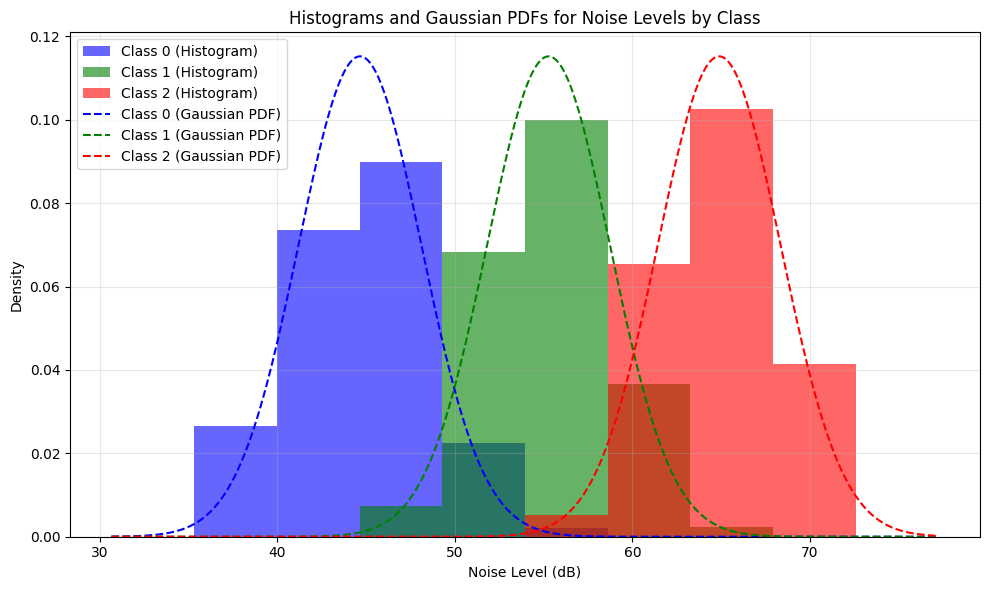

In [38]:

bins = 10  # Number of bins for histograms
x_min, x_max = nstr_ds['NoiseLevel'].min() - 5, nstr_ds['NoiseLevel'].max() + 5  # Range for the x-axis

# Generate x-values for plotting Gaussian PDFs
x_values = np.linspace(x_min, x_max, 500)

# Calculate Gaussian PDFs using MLEs
pdf_class_0 = sps.norm.pdf(x_values, loc=mean_0, scale=np.sqrt(common_variance))
pdf_class_1 = sps.norm.pdf(x_values, loc=mean_1, scale=np.sqrt(common_variance))
pdf_class_2 = sps.norm.pdf(x_values, loc=mean_2, scale=np.sqrt(common_variance))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(class_0_data, bins=bins, range=(x_min, x_max), color='blue', alpha=0.6, label='Class 0 (Histogram)', density=True)
plt.hist(class_1_data, bins=bins, range=(x_min, x_max), color='green', alpha=0.6, label='Class 1 (Histogram)', density=True)
plt.hist(class_2_data, bins=bins, range=(x_min, x_max), color='red', alpha=0.6, label='Class 2 (Histogram)', density=True)

# Overlay Gaussian PDFs
plt.plot(x_values, pdf_class_0, color='blue', linestyle='--', label='Class 0 (Gaussian PDF)')
plt.plot(x_values, pdf_class_1, color='green', linestyle='--', label='Class 1 (Gaussian PDF)')
plt.plot(x_values, pdf_class_2, color='red', linestyle='--', label='Class 2 (Gaussian PDF)')

# Label the plot
plt.title('Histograms and Gaussian PDFs for Noise Levels by Class')
plt.xlabel('Noise Level (dB)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


### (b)

The histograms visually confirm the alignment with the Gaussian PDFs, with only minor deviations. I think that these deviations are acceptable in most real-world data scenarios so gaussian distribution with shared variance but different means is a reasonable assumption for the NoiseLevel feature

## 1.3

In [39]:

# Count the number of samples in each class
count_class_0 = len(nstr_ds[nstr_ds['ClassLabel'] == 0.0])
count_class_1 = len(nstr_ds[nstr_ds['ClassLabel'] == 1.0])
count_class_2 = len(nstr_ds[nstr_ds['ClassLabel'] == 2.0])

# Calculate prior probabilities
prior_class_0 = count_class_0 / n
prior_class_1 = count_class_1 / n
prior_class_2 = count_class_2 / n

# Print the results
print(f"Prior Probability of Class 0: {prior_class_0:.3f}")
print(f"Prior Probability of Class 1: {prior_class_1:.3f}")
print(f"Prior Probability of Class 2: {prior_class_2:.3f}")

Prior Probability of Class 0: 0.263
Prior Probability of Class 1: 0.220
Prior Probability of Class 2: 0.517


## 1.4

In [40]:
# Perform ML classification
ml_predictions = []
test_data = pd.read_csv("NoiseClassificationTestData.csv")



for noise_level in test_data['NoiseLevel']:
    # Calculate likelihoods for each class using the Gaussian PDF
    likelihood_class_0 = sps.norm.pdf(noise_level, loc=mean_0, scale=np.sqrt(common_variance))
    likelihood_class_1 = sps.norm.pdf(noise_level, loc=mean_1, scale=np.sqrt(common_variance))
    likelihood_class_2 = sps.norm.pdf(noise_level, loc=mean_2, scale=np.sqrt(common_variance))
    
    # Find the class with the maximum likelihood
    predicted_class = np.argmax([likelihood_class_0, likelihood_class_1, likelihood_class_2])
    
    # Append the predicted class
    ml_predictions.append(predicted_class)

# Add predictions to the test data for evaluation
test_data['ML_Predictions'] = ml_predictions


# Count how many samples were classified into each class
classification_counts = test_data['ML_Predictions'].value_counts()
print("\nNumber of samples classified as each class:")
print(classification_counts)

# Evaluate accuracy for each actual class
for actual_class in [0, 1, 2]:
    correctly_classified = len(test_data[(test_data['ClassLabel'] == actual_class) & (test_data['ML_Predictions'] == actual_class)])
    print(f"Correctly classified samples for Class {actual_class}: {correctly_classified}")





#MAP
map_predictions = []

#Common Start for Bayes+ MAP
# Define the loss matrix

loss_matrix = np.array([
    [-1,  2,  4],  # Loss for predicting C0
    [ 2,  0,  4],  # Loss for predicting C1
    [ 4,  4,  0]   # Loss for predicting C2
])

# Perform Bayes classification
bayes_predictions = []
for noise_level in test_data['NoiseLevel']:
    # Calculate posterior probabilities
    likelihood_class_0 = sps.norm.pdf(noise_level, loc=mean_0, scale=np.sqrt(common_variance))
    likelihood_class_1 = sps.norm.pdf(noise_level, loc=mean_1, scale=np.sqrt(common_variance))
    likelihood_class_2 = sps.norm.pdf(noise_level, loc=mean_2, scale=np.sqrt(common_variance))
    
    # Compute posteriors
    posterior_class_0 = likelihood_class_0 * prior_class_0
    posterior_class_1 = likelihood_class_1 * prior_class_1
    posterior_class_2 = likelihood_class_2 * prior_class_2

    #for map
    predicted_map_class = np.argmax([posterior_class_0, posterior_class_1, posterior_class_2])
    map_predictions.append(predicted_map_class)

    posteriors = np.array([posterior_class_0, posterior_class_1, posterior_class_2])
    
    # Normalize posteriors to ensure they sum to 1 (optional)
    posteriors /= posteriors.sum()
    
    # Calculate expected losses for each class
    expected_losses = []
    for k in range(3):  # For each predicted class
        expected_loss = sum(loss_matrix[k, j] * posteriors[j] for j in range(3))
        expected_losses.append(expected_loss)
    
    # Choose the class with the minimum expected loss
    predicted_bayes_class = np.argmin(expected_losses)
    bayes_predictions.append(predicted_bayes_class)

# Add MAP predictions to the test data
test_data['MAP_Predictions'] = map_predictions



# Count how many samples were classified into each class (MAP)
classification_counts_map = test_data['MAP_Predictions'].value_counts()
print("\nNumber of samples classified into each class (MAP):")
print(classification_counts_map)

# Evaluate accuracy for each actual class (MAP)
for actual_class in [0, 1, 2]:
    correctly_classified_map = len(test_data[(test_data['ClassLabel'] == actual_class) & (test_data['MAP_Predictions'] == actual_class)])
    print(f"Correctly classified samples for Class {actual_class} (MAP): {correctly_classified_map}")


# Bayes

# Add Bayes predictions to the test data
test_data['Bayes_Predictions'] = bayes_predictions



# Count how many samples were classified into each class (Bayes)
classification_counts_bayes = test_data['Bayes_Predictions'].value_counts()
print("\nNumber of samples classified into each class (Bayes):")
print(classification_counts_bayes)

# Evaluate accuracy for each actual class (Bayes)
for actual_class in [0, 1, 2]:
    correctly_classified_bayes = len(test_data[(test_data['ClassLabel'] == actual_class) & (test_data['Bayes_Predictions'] == actual_class)])
    print(f"Correctly classified samples for Class {actual_class} (Bayes): {correctly_classified_bayes}")



Number of samples classified as each class:
ML_Predictions
2    50
1    28
0    22
Name: count, dtype: int64
Correctly classified samples for Class 0: 21
Correctly classified samples for Class 1: 21
Correctly classified samples for Class 2: 50

Number of samples classified into each class (MAP):
MAP_Predictions
2    52
1    25
0    23
Name: count, dtype: int64
Correctly classified samples for Class 0 (MAP): 22
Correctly classified samples for Class 1 (MAP): 20
Correctly classified samples for Class 2 (MAP): 51

Number of samples classified into each class (Bayes):
Bayes_Predictions
2    52
0    26
1    22
Name: count, dtype: int64
Correctly classified samples for Class 0 (Bayes): 25
Correctly classified samples for Class 1 (Bayes): 20
Correctly classified samples for Class 2 (Bayes): 51


## 1.5

### (a)

In [41]:
n_samples = len(test_data)

def compute_zero_one_loss(predictions, true_labels):
    incorrect_predictions = (predictions != true_labels).sum()
    zero_one_loss = incorrect_predictions / n_samples
    return zero_one_loss

ml_zero_one_loss = compute_zero_one_loss(test_data['ML_Predictions'], test_data['ClassLabel'])
map_zero_one_loss = compute_zero_one_loss(test_data['MAP_Predictions'], test_data['ClassLabel'])
bayes_zero_one_loss = compute_zero_one_loss(test_data['Bayes_Predictions'], test_data['ClassLabel'])

print(f"Zero-One Loss (ML): {ml_zero_one_loss:.3f}")
print(f"Zero-One Loss (MAP): {map_zero_one_loss:.3f}")
print(f"Zero-One Loss (Bayes): {bayes_zero_one_loss:.3f}")




Zero-One Loss (ML): 0.080
Zero-One Loss (MAP): 0.070
Zero-One Loss (Bayes): 0.040


### (b)

In [42]:
def compute_empirical_risk(predictions, true_labels, loss_matrix):
    total_loss = 0
    for i in range(n_samples):
        true_class = int(true_labels[i])
        predicted_class = int(predictions[i])
        total_loss += loss_matrix[predicted_class, true_class]
    empirical_risk = total_loss / n_samples
    return empirical_risk

ml_empirical_risk = compute_empirical_risk(test_data['ML_Predictions'], test_data['ClassLabel'], loss_matrix)
map_empirical_risk = compute_empirical_risk(test_data['MAP_Predictions'], test_data['ClassLabel'], loss_matrix)
bayes_empirical_risk = compute_empirical_risk(test_data['Bayes_Predictions'], test_data['ClassLabel'], loss_matrix)

print(f"Empirical Risk (ML): {ml_empirical_risk:.3f}")
print(f"Empirical Risk (MAP): {map_empirical_risk:.3f}")
print(f"Empirical Risk (Bayes): {bayes_empirical_risk:.3f}")

Empirical Risk (ML): -0.030
Empirical Risk (MAP): -0.060
Empirical Risk (Bayes): -0.150


## 1.6

### (a)

MAP Classifier is theoretically designed to minimize the 0/1 loss

### (b)

Bayes Classifier is designed to minimize the general loss given a loss function

### (c)

No the findings do not align, the 0/1 loss is lowest for Bayes Classification and the General Loss is also lowest for Bayes Classification

### (d)

The Sample size could be a reason why the theoretical garuntees does not match with empirical results. Here the sample size of 400 can be very small and the model could be overfitting.